# Введение в искусственные нейронные сети
# Урок 4. Сверточные нейронные сети

In [13]:
#import cv2
import matplotlib.pyplot as plt

In [2]:
import numpy as np

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers

import tensorflow.keras as keras
#import tensorflow as tf
from tensorflow.keras.utils import plot_model, to_categorical

In [3]:
from tensorflow.keras.datasets import mnist

# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255 
x_test /= 255 

# трансформация лейблов в one-hot encoding
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)



In [4]:
# инициализация пустой модели
model = Sequential()

# первый сверточный слой
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))

# второй пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# третий сверточный слой
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# четвертый пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# пятый полносвязный слой
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(layers.Flatten())

# шестой полносвязный слой
model.add(layers.Dense(84, activation='tanh'))

# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))


# компилияция модели
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


hist = model.fit(x=x_train,y=y_train, epochs=2, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))




Epoch 1/2
469/469 [==============================] - 16s 31ms/step - loss: 1.3218 - accuracy: 0.7026 - val_loss: 0.5899 - val_accuracy: 0.8593
Epoch 2/2
313/313 [==============================] - 1s 4ms/step - loss: 0.3972 - accuracy: 0.8947
Test loss 0.3972, accuracy 89.47%


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [7]:
plot_model(model,'model_sconv.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [8]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


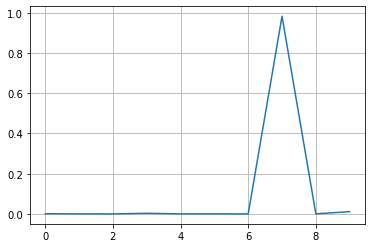

[9.2072011e-04 2.6889503e-04 1.3307828e-04 3.1216610e-03 3.5660842e-04
 3.2538318e-04 8.8857178e-06 9.8319227e-01 3.8621586e-04 1.1286376e-02]


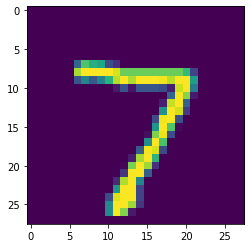

In [14]:
plt.plot(y_pred[0][:])
plt.grid()
plt.show()
print(y_pred[0][:])
plt.imshow(x_test[0][:,:,0])

plt.show()

Построим примерно такую же сеть через функцианальное описание

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255 
x_test /= 255 

# трансформация лейблов в one-hot encoding
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

4422102/4422102 [==============================] - 0s 0us/step


In [65]:
from tensorflow.keras.models import Model 
# инициализация  модели
input1= layers.Input(shape=(28,28,1))
# первый сверточный слой
x1 = layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh',  padding="same")(input1)

# второй пуллинговый слой
x2 = layers.AveragePooling2D(pool_size=(1, 1), strides=(2, 2), padding='valid')(x1)

# третий сверточный слой
x3 = layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x2)

# четвертый пуллинговый слой
x4 = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x3)

# пятый  слой
x5 = layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x4)

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x6 = layers.Flatten()(x5)

# шестой полносвязный слой
x7 = layers.Dense(84, activation='tanh')(x6)

# выходной слой с функцией активации softmax
out_x = layers.Dense(10, activation='softmax')(x7)


# Соберем полную модель сети от входа к выходу 
model1 = Model(inputs = input1, outputs = out_x) 
# сделаем несколько промежуточных выходов (через них посмотрим , что происходит в сети) 
model3 = Model(inputs = input1, outputs = x3)
model5 = Model(inputs = input1, outputs = x5)
# компилияция модели
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

# Обучаем модель
hist = model1.fit(x=x_train,y=y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model1.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 1.3014 - accuracy: 0.5956 - val_loss: 0.8583 - val_accuracy: 0.7060
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.7417 - accuracy: 0.7347 - val_loss: 0.6959 - val_accuracy: 0.7398
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.6398 - accuracy: 0.7639 - val_loss: 0.6347 - val_accuracy: 0.7611
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5911 - accuracy: 0.7799 - val_loss: 0.5987 - val_accuracy: 0.7746
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5580 - accuracy: 0.7945 - val_loss: 0.5756 - val_accuracy: 0.7790
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5323 - accuracy: 0.8065 - val_loss: 0.5484 - val_accuracy: 0.7956
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.5111 - accuracy: 0.8168 - val_loss: 0.5317 - val_accuracy: 0.8015
Epoch 

Сделаем предикт для примеров тестов

In [ ]:
model1.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_6 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_20 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_21 (Conv2D)          (None, 1, 1, 120)         481

In [67]:
y_pred=model1.predict(x_test)

313/313 [==============================] - 1s 2ms/step


Подглядываем в третий сверточный слой

In [68]:
b = model3.predict(x_test)



313/313 [==============================] - 0s 1ms/step


Подглядываем в пятый слой

In [69]:
b1 = model5.predict(x_test)

313/313 [==============================] - 0s 1ms/step


Содержание внутреннего слоя 

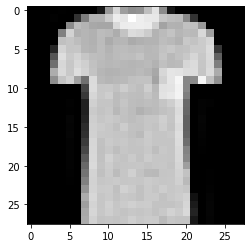

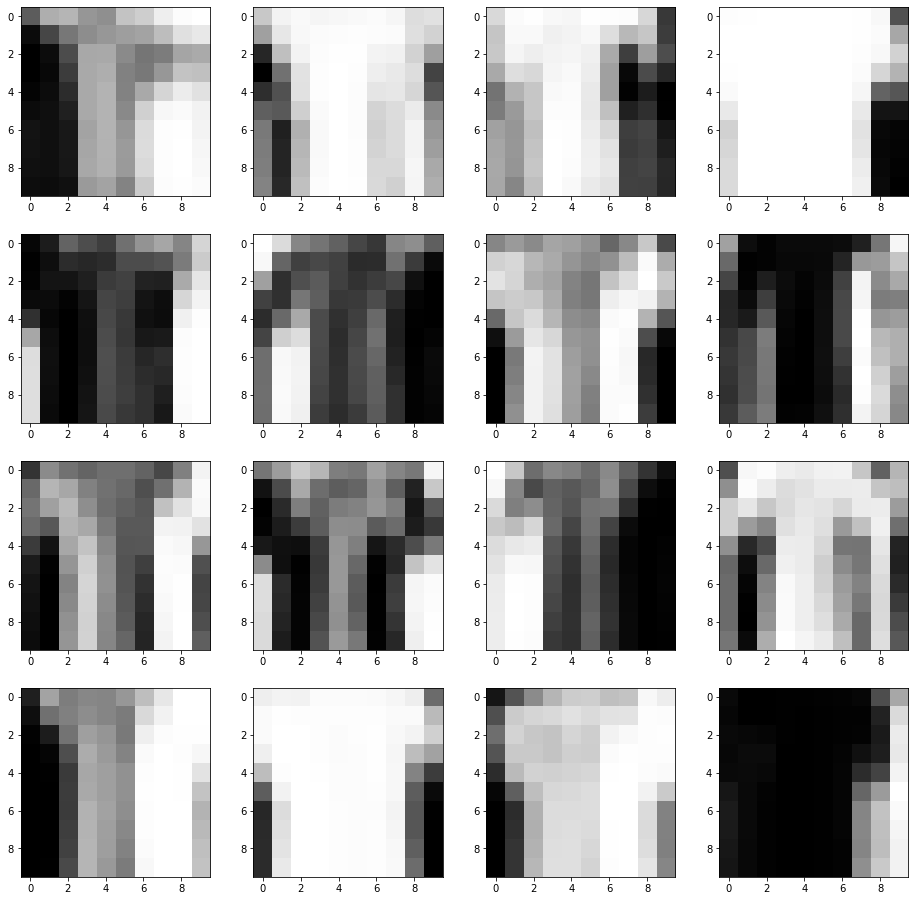

In [75]:
n = 501
plt.imshow(x_test[n,:,:,0])
plt.show()

plt.figure(figsize=(16,16))
for i in range(4):
  for j in range(4):
    plt.subplot(4,4,i*4+j+1)
    plt.imshow(b[n][:,:,i*4+j])
plt.show()

Сделаем ссылку для обращения к слою

In [71]:
wg = model5.get_layer(index = -1)

Получим веса слоя

In [72]:
w_ = wg.get_weights()

Размер ядер слоя

In [73]:
w_[0].shape

(5, 5, 16, 120)

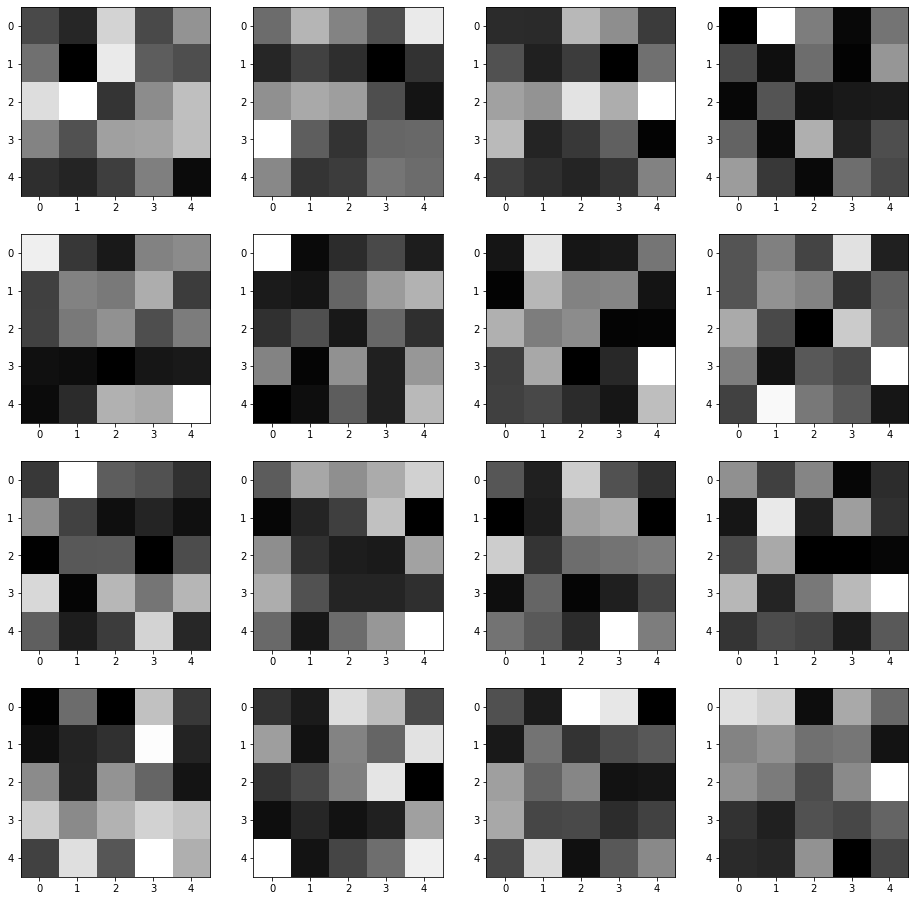

In [74]:
plt.figure(figsize=(16,16))
for i in range(4):
  for j in range(4):
    plt.subplot(4,4,i*4+j+1)
    plt.imshow(np.abs(w_[0][:,:,i*4+j,0]))
plt.show()

In [76]:
w_[0][:,:,3*4+3,0]

array([[ 0.05930543,  0.05572423,  0.00415605,  0.04495132, -0.02780477],
       [ 0.03511148,  0.03856251,  0.02998149,  0.03161088,  0.00556136],
       [-0.03873301, -0.03286546, -0.02055893, -0.03684086, -0.06753076],
       [ 0.01374423, -0.00936874,  0.02179767,  0.01920908, -0.02678967],
       [-0.0115546 ,  0.0107122 , -0.03895595, -0.00055333,  0.01862497]],
      dtype=float32)

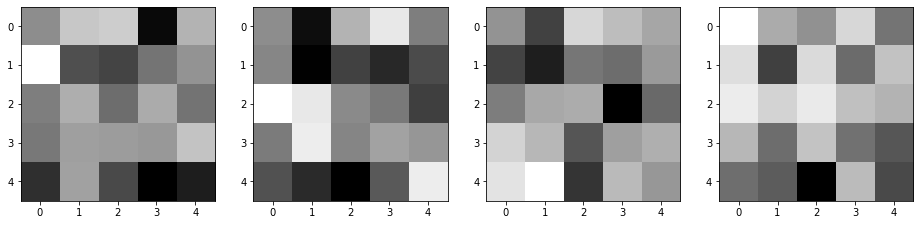

In [77]:
plt.figure(figsize=(16,4))
for i in range(1):
  for j in range(4):
    plt.subplot(1,4,j+1)
    plt.imshow((w_[0][:,:,0,3*4+j]))
plt.show()

In [78]:
model1.summary()

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_8 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_23 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_9 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_24 (Conv2D)          (None, 1, 1, 120)         481



## **Сложные конструкции из простых слоев**

Слой для объединения

https://keras.io/api/layers/merging_layers/concatenate/

In [79]:

from tensorflow.keras.layers import Dense, Flatten, Concatenate

from tensorflow.keras.utils import plot_model 


Строим сеть из трех нитей

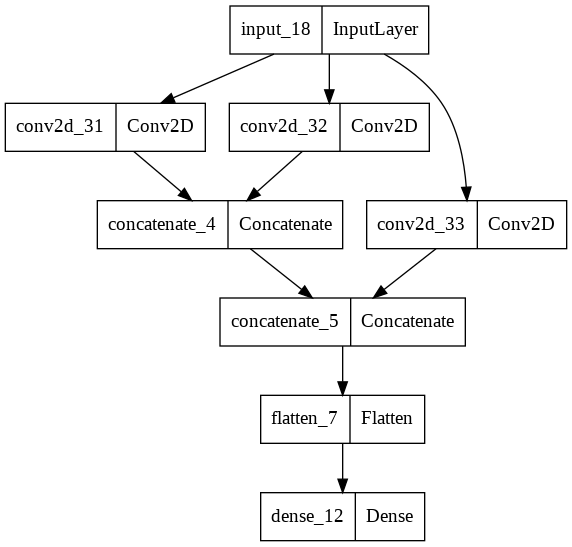

In [82]:
first_input = Input(shape=(28,28,1 ))
x11= Conv2D(16,3,activation='relu',padding = 'same')(first_input)
#x11= Flatten()(x11)
first_dense = x11# Dense(10, )(x11)

#second_input = Input(shape=(28,28,1 ))
x22= Conv2D(16,5,activation='relu',padding = 'same')(first_input)
#x22= Flatten()(x22)
second_dense = x22 #Dense(10, )(x22)

merge_one = Concatenate(  axis =-1 )([first_dense, second_dense])

third_input = Input(shape=(28,28,1 ))
x33= Conv2D(16,1,activation='relu',padding = 'same')(first_input)
#x33= Flatten()(x33)
#x33 = Dense(10, )(x33)
merge_two1 = Concatenate(axis = -1)([merge_one, x33])
merge_two= Flatten()(merge_two1)
merge_two=Dense(10, activation='softmax')(merge_two)

model_stek = Model(inputs=first_input, outputs=merge_two)
#model_stek = Model(inputs=[first_input, second_input, third_input], outputs=merge_two)
ada_grad = tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
model_stek.compile(optimizer=ada_grad, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


plot_model(model_stek,'model_stek.png')



In [83]:
model_stek.summary()

Model: "model_31"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_31 (Conv2D)             (None, 28, 28, 16)   160         ['input_18[0][0]']               
                                                                                                  
 conv2d_32 (Conv2D)             (None, 28, 28, 16)   416         ['input_18[0][0]']               
                                                                                                  
 concatenate_4 (Concatenate)    (None, 28, 28, 32)   0           ['conv2d_31[0][0]',              
                                                                  'conv2d_32[0][0]']       

In [84]:
#hist = model_stek.fit([x_train,x_train,x_train],y_train, epochs = 5, validation_split=0.2)
hist = model_stek.fit(x_train,y_train, epochs = 5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4731 - accuracy: 0.8446 - val_loss: 0.3474 - val_accuracy: 0.8777
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3072 - accuracy: 0.8917 - val_loss: 0.2994 - val_accuracy: 0.8953
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2623 - accuracy: 0.9074 - val_loss: 0.2914 - val_accuracy: 0.9002
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2340 - accuracy: 0.9155 - val_loss: 0.2775 - val_accuracy: 0.9006
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2103 - accuracy: 0.9245 - val_loss: 0.2718 - val_accuracy: 0.9062


## Пример на Keras более сложной сверточной нейронной сети

Давайте теперь попробуем сделать несколько усложненный вариант нейронной сети разобранной ранее. В ней будет на несколько слоев больше и в ней будет использоваться data augumentation, процедура позволяющая за счет искажений изображений увеличить количество тренировочных данных, а как мы знаем чем больше тренировочных данных тем лучше будет работать нейросеть. Для обучения нейросети будем использовать датасет cifar-10. В нем 10 категорий объектов, например - лошадь, лягушка, корабль. Данный датасет уже более сложен для нейронных сетей чем mnist, однако он намного проще датасетов наподобие imagenet где используются сотни классов и архитектуры нейронных сетей для подобных датасетов также понадобяться более сложные.

In [85]:
from __future__ import print_function
#import tensorflow.keras as keras # расскоментируйте эту строку, чтобы начать обучение
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

In [86]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [87]:


# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 1
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170498071/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [88]:
data_augmentation = False

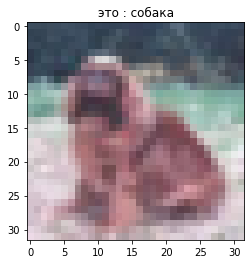

In [92]:
N = 101

plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[np.argmax(y_test[N,:])])
plt.show()

In [94]:


# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=-1)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0976 - accuracy: 0.2187 - val_loss: 1.8699 - val_accuracy: 0.3202
сохранить обученную модель как /content/saved_models/keras_cifar10_trained_model.h5 
313/313 [==============================] - 1s 4ms/step - loss: 1.8699 - accuracy: 0.3202
Test loss: 1.869889259338379
Test accuracy: 0.32019999623298645


In [95]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                      

Что вернет ImageDataGenerator

In [96]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=15, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip= False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

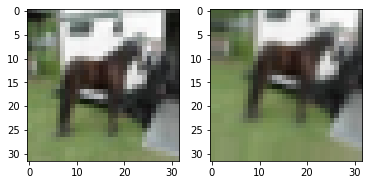

In [100]:
N=20
datagen.fit(x_test)
for imag,y  in datagen.flow(x_test[N:N+1,:,:,:],y_test[N:N+1], batch_size=1):
  plt.subplot(1,2,1)
  plt.imshow(x_test[N][:,:,:])
  plt.subplot(1,2,2)
  plt.imshow(imag[0,:,:,:])

  plt.show()
  if True:
    break


In [101]:
 model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


1563/1563 [==============================] - 31s 20ms/step - loss: 1.8431 - accuracy: 0.3265 - val_loss: 1.6395 - val_accuracy: 0.4035


In [102]:
 model.fit(x_train, y_train,       batch_size=batch_size,epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6423 - accuracy: 0.3973 - val_loss: 1.5100 - val_accuracy: 0.4518
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5092 - accuracy: 0.4502 - val_loss: 1.3555 - val_accuracy: 0.5118
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4038 - accuracy: 0.4930 - val_loss: 1.2834 - val_accuracy: 0.5456
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3256 - accuracy: 0.5242 - val_loss: 1.1942 - val_accuracy: 0.5765
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2588 - accuracy: 0.5512 - val_loss: 1.1680 - val_accuracy: 0.5879


1/1 [==============================] - 0s 132ms/step


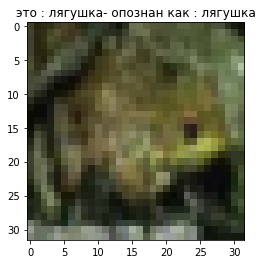

In [ ]:
N = 107
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

## Практическое задание

Вариант 1. (простой)

- обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг  (conv-pool)-(conv-pool)-...) на датасете fashion-mnist или cifar10
- оценить рост точности при увеличении ширины сети (больше ядер)
- оценить рост точности при увеличении глубины сети (больше слоев)
- (опциционально)сравнить с точностью полносвязной сети для этой выборки
    </li>

Вариант 2. (сложный)
- реализовать нейронную сеть или стек из сверток (Concatenate) на сifar10.
- оценить рост точности при увеличении ширины сети (больше ядер), больше нитей.
- оценить рост точности при увеличении глубины сети (больше слоев)
    </li>
</ol>

## Дополнительные материалы

<ol>
    <li>https://keras.io/layers/convolutional/</li>
    <li>https://keras.io/layers/pooling/</li>
    <li>https://keras.io/preprocessing/image/</li>
</ol>

Вопрос:

1. есть сверточный слой с ядром (2,2), ядер в слое 16, padding = 'valid', на вход приходит тензор (10,100,100, 4) , что будет на выходе (размер выходного тензора)

2. есть слой MaxPooling2D с ядром (2,2),  padding = 'valid', на вход приходит тензор (10,100,100, 4) , что будет на выходе (размер выходного тензора)

3. есть сверточный слой с ядром (3,3), ядер в слое 16, padding = 'same', на вход приходит тензор (10,100,100, 4) , что будет на выходе (размер выходного тензора)

4. есть сверточный слой с ядром (3,3), ядер в слое 16, padding = 'valid', на вход приходит тензор (10,100,100, 4) , сколько параметров настраиваем

5. есть слой MaxPooling2D с ядром (2,2),padding = 'valid', на вход приходит тензор (10,100,100, 4) , сколько параметров настраиваем

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://keras.io</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Николенко Сергей Игоревич, Кадурин А. А. - Глубокое обучение. Погружение в мир нейронных сетей  2018</li>
    <li>Francois Chollet - Deep Learning with Python 2018</li>
    <li>Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton - ImageNet Classification with Deep Convolutional Neural Networks</li>
    <li>Karen Simonyan, Andrew Zisserman - Very Deep Convolutional Networks for Large-Scale Image Recognition</li>
    <li>Википедия</li>    
</ol>

In [ ]:
from tensorflow.keras.datasets import imdb

In [ ]:
(x,y),(d,h) =imdb.load_data(path='imdb.npz')

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
h[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [ ]:
y[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])